# Chapter 4: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [4]:
!wget https://nlp100.github.io/data/neko.txt -P ../data/

--2020-06-29 17:46:58--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘../data/neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.09s   

2020-06-29 17:46:58 (10.1 MB/s) - ‘../data/neko.txt’ saved [975789/975789]



In [7]:
# !brew install mecab mecab-ipadic
# !git clone --depth 1 git@github.com:neologd/mecab-ipadic-neologd.git
# !cd mecab-ipadic-neologd
# !./bin/install-mecab-ipadic-neologd -n

In [8]:
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/local/lib/mecab/dic/mecab-ipadic-neologd


In [ ]:
# !mecab ../data/neko.txt -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd -o ../data/neko.txt.mecab
!mecab ../data/neko.txt -o ../data/neko.txt.mecab

In [13]:
!head -20 ../data/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩は猫である	名詞,固有名詞,一般,*,*,*,吾輩は猫である,ワガハイハネコデアル,ワガハイワネコデアル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　


## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [95]:
import re

class POS:
    def __init__(self, file):
        self._doc = []
        
        lines = []
        with open(file, "r") as f:
            for line in f.readlines():
                if not re.match("\n", line):
                    if re.match("EOS", line):
                        if lines:
                            self._doc.append(lines)
                            lines = []
                    else:
                        try:
                            surface, rest = line.split("\t")
                        except Exception as e:
                            print(e)
                        
                        if len(rest.split(",")) == 9:
                            pos, pos1, _, _, _, _, base, _, _ = rest.split(",")
                        else:
                            pos, pos1, _, _, _, _, base = rest.split(",")

                        dic = {
                                "surface": surface.strip(),
                                "base": base.strip(),
                                "pos": pos.strip(),
                                "pos1": pos1.strip()
                            }

                        lines.append(dic)
        
    def head(self, n=10):
        print(self._doc[:n])
        
    def doc(self):
        return self._doc

In [190]:
pos = POS("../data/neko.txt.mecab")

## 31. 動詞

動詞の表層形をすべて抽出せよ．

In [191]:
v_surface = []
for i in pos.doc():
    for j in i:
        if j["pos"] == "動詞":
            v_surface.append(j["surface"])
            
print(" ".join(v_surface))

生れ つか し 泣い し いる 始め 見 聞く 捕え 煮 食う 思わ 載せ られ 持ち上げ られ し あっ 落ちつい 見 見 思っ 残っ いる さ れ し 逢っ 出会わ し のみ なら し いる 吹く せ 弱っ 飲む 知っ 坐っ おっ する し 始め 動く 動く 分ら 廻る なる 助から 思っ いる さり し 出 し いる 考え出そ 分ら 付い 見る い おっ 見え 隠し しまっ 違っ 明い い られ 這い出し 見る 棄て られ 這い出す ある 坐っ し 考え 見 出 し 泣い 来 くれる 考え付い やっ 見 来 渡っ かかる 減っ 来 泣き 出 ある ある し そろ 廻り 始め し 這っ 行く 出 這入っ なる 思っ 崩れ もぐり込ん 破れ い し 知れ 云っ 至る する なっ いる 忍び込ん 分ら なる 減る 降っ 来る 出来 なっ あるい 行く 考える 這入っ おっ 見る し 逢っ 見る つかん 抛り出し 思っ ねぶっ 任せ い 出来 見 這い 上っ 投げ出さ れ 投げ出さ れ 這い 上り 這い 上っ 投げ出さ れ 繰り返し し いる 云う なっ し やっ 下り つまみ出さ れよ し いい 出 来 ぶら下げ 向け 出し 出し 上っ 来 困り いう 撚り 眺め おっ 置い やれ 這入っ しまっ 聞か 見え 抛り出し 極める し 合せる 帰る 這入っ 出 来る 思っ いる 見せ いる いう 覗い 見る し いる ある 読みかけ ある たらし いる 帯び あらわし いる 食う 食っ 飲む 飲ん ひろげる 読む なる 垂らす 繰り返す 考える ある 生れ なる 限る 寝 い 勤まる 出来 云わ せる 来る 鳴らし いる 住み込ん 行っ 跳ね 付け られ し くれ さ れ 至る つけ くれ 分る 出来 得る 入れ くれ いる つとめ 読む 乗る する 乗る 構い やむを得ん 寝る し 入っ もぐり込ん ねる なる 入っ 寝る 見出し 割り込む 醒ます なる 来 来 いっ 泣き 出す さまし 飛び出し くる 叩か れ し すれ する せ 得 なっ する 至っ し かぶせ 抛り出し 押し込ん する しよ 追い廻し 加える 磨い 怒っ 入れ え い する 逢う 言っ 産まれ 持っ 行っ 棄て 来たそ 流し 話し する 戦っ せ なら いわ れ 思う 隣り 解し い いっ し 

## 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [192]:
v_base = []
for i in pos.doc():
    for j in i:
        if j["pos"] == "動詞":
            v_base.append(j["base"])
            
print(" ".join(v_base))

生れる つく する 泣く する いる 始める 見る 聞く 捕える 煮る 食う 思う 載せる られる 持ち上げる られる する ある 落ちつく 見る 見る 思う 残る いる する れる する 逢う 出会う する のむ なる する いる 吹く する 弱る 飲む 知る 坐る おる する する 始める 動く 動く 分る 廻る なる 助かる 思う いる さる する 出る する いる 考え出す 分る 付く 見る いる おる 見える 隠す しまう 違う 明く いる られる 這い出す 見る 棄てる られる 這い出す ある 坐る する 考える 見る 出る する 泣く 来る くれる 考え付く やる 見る 来る 渡る かかる 減る 来る 泣く 出る ある ある する そる 廻る 始める する 這う 行く 出る 這入る なる 思う 崩れる もぐり込む 破れる いる する 知れる 云う 至る する なる いる 忍び込む 分る なる 減る 降る 来る 出来る なる あるく 行く 考える 這入る おる 見る する 逢う 見る つかむ 抛り出す 思う ねぶる 任せる いる 出来る 見る 這う 上る 投げ出す れる 投げ出す れる 這う 上る 這う 上る 投げ出す れる 繰り返す する いる 云う なる する やる 下りる つまみ出す れる する いう 出る 来る ぶら下げる 向ける 出す 出す 上る 来る 困る いう 撚る 眺める おる 置く やる 這入る しまう 聞く 見える 抛り出す 極める する 合せる 帰る 這入る 出る 来る 思う いる 見せる いる いう 覗く 見る する いる ある 読みかける ある たらす いる 帯びる あらわす いる 食う 食う 飲む 飲む ひろげる 読む なる 垂らす 繰り返す 考える ある 生れる なる 限る 寝る いる 勤まる 出来る 云う せる 来る 鳴らす いる 住み込む 行く 跳ねる 付ける られる する くれる する れる 至る つける くれる 分る 出来る 得る 入れる くれる いる つとめる 読む 乗る する 乗る 構う やむを得る 寝る する 入る もぐり込む ねる なる 入る 寝る 見出す 割り込む 醒ます なる 来る 来る いう 泣く 出す さます 飛び出す くる 叩く れる する する する する 得る なる する 至る する かぶせる 

## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [193]:
no = []
for p in pos.doc():
    for i, j in enumerate(p):
        if j["surface"] == "の":
            try:
                prev = p[i-1]
                nex = p[i+1]
            except Exception as e:
                print(e)
                continue
            
            if prev["pos"] == "名詞" and nex["pos"] == "名詞":
                no.append(prev["surface"] + j["surface"] + nex["surface"])
                
print(" ".join(no))

彼の掌 掌の上 書生の顔 はずの顔 顔の真中 穴の中 書生の掌 掌の裏 何の事 肝心の母親 藁の上 笹原の中 池の前 池の上 一樹の蔭 垣根の穴 隣家の三 時の通路 一刻の猶予 家の内 彼の書生 以外の人間 前の書生 おさんの隙 おさんの三 胸の痞 家の主人 主人の方 鼻の下 吾輩の顔 自分の住 吾輩の主人 家のもの うちのもの 彼の書斎 本の上 皮膚の色 本の上 彼の毎夜 以外のもの 主人の傍 彼の膝 膝の上 経験の上 飯櫃の上 炬燵の上 ここのうち 供の寝床 彼等の中間 供の一 例の神経 性の主人 次の部屋 自分の勝手 吾輩の方 台所の板の間 吾輩の尊敬 向の白 玉のよう そこの家 家の書生 裏の池 親子の愛 もっともの議論 刺の頭 鰡の臍 彼等のため 軍人の家 代言の主人 教師の家 猫の時節 吾輩の家 家の主人 だらけの英文 胃弱の癖 後架の中 平の宗 月の月給 当分の間 下のよう 今更のよう 主人の述懐 彼の友 金縁の眼鏡 主人の顔 内の想像 訳のもの 利の大家 金縁の裏 吾輩の後ろ 彼の友 吾輩の輪廓 顔のあたり 上乗の出来 顔の造作 他の猫 不器量の吾輩 吾輩の主人 斯産の猫 斑入りの皮膚 主人の彩色 一種の色 身内の筋肉 主人の予定 座敷の中 悪口の言いよう 人の気 彼の背中 こっちの便利 自己の力量 人間の不徳 吾輩の家 家の裏 浩然の気 小春の穏 日の二 茶の木の根 西側の杉 垣のそば 他の庭 純粋の黒 彼の皮膚 皮膚の上 毛の間 中の大王 吾輩の倍 嘆賞の念 好奇の心 彼の前 小春の風 垣の上 梧桐の枝 枚の葉 枯菊の茂み 真丸の眼 人間の珍重 双眸の奥 吾輩の矮小 額の上 声の底 吾輩の心臓 ここの教師 教師の家 良家の猫 車屋の黒 車屋の黒 主義の的 彼の名 軽侮の念 左の問答 車屋の方 うちの主人 車屋の猫 どこの国 己の後 教師の方 車屋の黒 相当の気焔 畠の中 黒の比較 彼の鼻 鼻の先 彼の気焔 自分の手柄 墻壁の欠 彼の答 鼠の百 掃除の時 うちの亭主 石灰の袋 椽の下 たちの野郎 溝の中 去年の臭気 鼻の頭 反対の結果 うちの亭主 己の御蔭 無学の黒 背中の毛 黒の子分 以外の御馳走 教師の家 教師のよう 吾輩の主人 日の日記 今日の会 質の人 人の妻君 連中のうち 吾輩の水彩 屋の酒 一廉の水彩 吾輩の水彩 野暮の方 芸者の妻君 

## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [194]:
nouns = []

for p in pos.doc():
    noun = []
    is_noun = False
    for j in p:
        if j["pos"] == "名詞":
            if not is_noun:
                noun.append(j["surface"])
                is_noun = True
            else:
                noun.append(j["surface"])
        else:
            if not is_noun:
                continue
            else:
                break
                
    nouns.append("".join(noun))
    
print(" ".join(nouns))

一  吾輩 名前  どこ 何 吾輩 あと 書生 当時 彼 掌 時妙 一毛 その後猫 顔 穴 咽 これ  書生 書生 胸 音 それ  気 たくさん 肝心 上今 眼 何 吾輩  思い 吾輩 これ 書生 ニャー 池 腹 声 仕方 非常 そこ ここ 縁 一樹 垣根 邸 うち 仕方 今 ここ 一 これ これ の 吾輩  吾輩 時 この間おさん 吾輩 下女 主人 主人 下女 吾輩  吾輩 職業 学校 家 当人 うち 吾輩 本 彼 癖 大飯 後 二三ページ 涎 これ 吾輩 教師 人間 もの 主人  吾輩 どこ 珍重 吾輩 朝主人 彼 これ その後 一番心持 供 吾輩 供 例 せんだって  吾輩 吾輩 自分 吾輩 この間 台所 吾輩 白君 そこ 白君 もっとも 三毛君 我々同族間 相手 彼等人間 彼等 白君 吾輩 日 人間 気  我儘 主人 俳句 癖 後架 みんな 主人 何 翌日 かき 当人  もの 人の 詐り 彼 昔 画 天 地 禽 獣 池 枯木 自然 君 アンドレア・デル・サルト   通り 金縁  翌日吾輩 眼 吾輩 彼 吾輩 欠伸 主人 彼 吾輩 吾輩 背 不器量 一色 吾輩 これ 主人 一種 上不思議 これ 吾輩 熱心 さっき 身内 一分 仕方 主人 主人 主人 ほか それ 人間 人間  我儘  吾輩 瀟洒 うち 小春 茶 彼 他 彼 午 彼 吾輩 吾輩 大王 今 眼 彼 双眸 大王 挨拶 名前 時吾輩 彼 猫 全て 吾輩 いや 言葉付 膏 吾輩 己 車屋 車屋 同盟敬遠主義 吾輩 吾輩  一体車屋 車屋 め 君 車屋 何 め 一 事 家 箆棒め 彼 吾輩  その後吾輩 邂逅 先  日例 め 事実 黒 黒 吾輩 君 彼 三四十 彼 たち 黒 去年 うち たち こん畜生 め の 吾輩 景気 君 彼 考げ 鼠 人 交番 うち 人間 吾輩 時 黒 御馳走 教師 要心  教師   人 人 質 人 元来放蕩家 放蕩家 これら 吾輩 関 料理屋 吾輩   通人論 芸者 主人 二日   昨夜 額 非常 これ   主人 これ  主人 彼 主人 西洋 アンドレア・デル・サルト 美学者 何 何 あれ 君 吾輩 美学者 彼 冗談 せんだって 時 話 せんだって 女主人公 僕 出鱈目 美学者 なに 美学者 主人 美学者 雪隠 君注意 奇警 彼  車屋 彼 吾輩 吾輩 吾輩  赤松 三間半  主人 

## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [195]:
words = []

for p in pos.doc():
    for j in p:
        if j["pos"] not in ["記号", "助詞", "助動詞"]:
            if j["base"] not in ["する", "いる", "なる", "てる", "れる", "ある", "こと", "もの", "の", "ん", "ない", "この", "その", "よう"]:
                if j["base"] == "*":
                    words.append(j["surface"])
                else:
                    words.append(j["base"])

In [196]:
from collections import Counter

counter = Counter(words)
print(counter.most_common())

[('云う', 1408), ('事', 1207), ('君', 973), ('主人', 932), ('見る', 675), ('御', 636), ('人', 602), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('吾輩', 481), ('来る', 460), ('これ', 414), ('それ', 381), ('聞く', 347), ('時', 345), ('迷亭', 343), ('行く', 340), ('出来る', 324), ('三', 319), ('——', 319), ('出る', 317), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('僕', 268), ('さん', 260), ('気', 250), ('猫', 248), ('また', 238), ('中', 234), ('十', 231), ('出す', 227), ('どう', 220), ('知る', 217), ('細君', 213), ('見える', 208), ('鼻', 199), ('今', 195), ('大', 195), ('者', 194), ('そんな', 194), ('あの', 189), ('しかし', 185), ('自分', 175), ('分る', 173), ('少し', 172), ('頭', 169), ('ちょっと', 169), ('食う', 168), ('しまう', 166), ('くる', 166), ('訳', 159), ('前', 158), ('日', 154), ('声', 154), ('知れる', 152), ('うち', 152), ('ただ', 150), ('られる', 149), ('私', 149), ('男', 147), ('家', 143), ('子', 143), ('眼', 142), ('ため', 140), ('彼', 134), ('持つ', 134), ('誰', 133), ('間', 131), ('笑う', 

## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

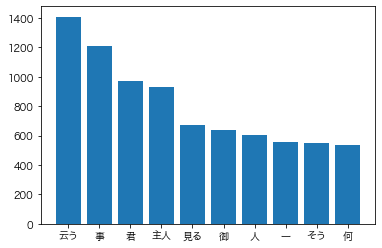

In [197]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.family'] = 'Hiragino Sans'

top = counter.most_common(10)
keys = [x[0] for x in top]
values = [x[1] for x in top]

plt.bar(keys, values)

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [198]:
neko = []

for p in pos.doc():
    for j in p:
        if j["base"] == "猫":
            neko.append(p)

In [199]:
co = []

for p in neko:
    for j in p:
        if j["pos"] not in ["記号", "助詞", "助動詞"]:
            if j["base"] not in ["する", "いる", "なる", "てる", "れる", "ある", "こと", "もの", "の", "ん", "ない", "この", "その", "よう", "猫"]:
                if j["base"] == "*":
                    co.append(j["surface"])
                else:
                    co.append(j["base"])

<BarContainer object of 10 artists>

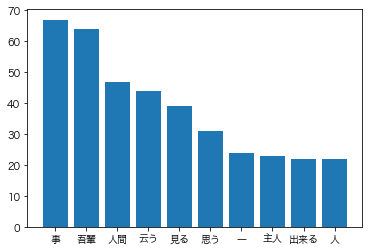

In [200]:
neko_counter = Counter(co)

top = neko_counter.most_common(10)
keys = [x[0] for x in top]
values = [x[1] for x in top]

plt.bar(keys, values)

## 38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

(array([1.1623e+04, 1.0900e+02, 2.9000e+01, 1.4000e+01, 1.5000e+01,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 7.13500e+01, 1.41700e+02, 2.12050e+02, 2.82400e+02,
        3.52750e+02, 4.23100e+02, 4.93450e+02, 5.63800e+02, 6.34150e+02,
        7.04500e+02, 7.74850e+02, 8.45200e+02, 9.15550e+02, 9.85900e+02,
        1.05625e+03, 1.12660e+03, 1.19695e+03, 1.26730e+03, 1.33765e+03,
        1.40800e+03]),
 <a list of 20 Patch objects>)

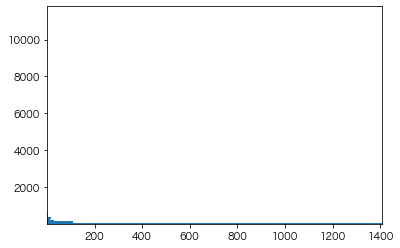

In [207]:
plt.xlim(1, counter.most_common(1)[0][1])
plt.ylim(1, len(counter.keys()) + 1)
plt.hist(counter.values(), bins=20, orientation="horizontal")

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

(array([1.1623e+04, 1.0900e+02, 2.9000e+01, 1.4000e+01, 1.5000e+01,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 7.13500e+01, 1.41700e+02, 2.12050e+02, 2.82400e+02,
        3.52750e+02, 4.23100e+02, 4.93450e+02, 5.63800e+02, 6.34150e+02,
        7.04500e+02, 7.74850e+02, 8.45200e+02, 9.15550e+02, 9.85900e+02,
        1.05625e+03, 1.12660e+03, 1.19695e+03, 1.26730e+03, 1.33765e+03,
        1.40800e+03]),
 <a list of 20 Patch objects>)

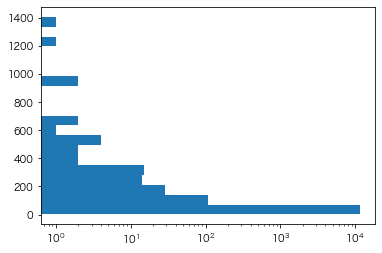

In [202]:
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, len(counter.keys()) + 1)
plt.ylim(1, counter.most_common(1)[0][1])
plt.scatter(x=)